In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 48.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 9.85MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 64.2MB/s]


# 1. 데이터셋 확인

* 우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label 은 Survived 입니다.
*   1.1 null data check



In [ ]:
import numpy as np #수치해석 벡터연산
import pandas as pd #데이터프레임(sql)을 쉽게 다루는
import matplotlib.pyplot as plt #시각화
import seaborn as sns #시각화

plt.style.use('seaborn')
sns.set(font_scale = 2.5)
#matplotlib의 기본 scheme 말고 seaborn scheme세팅
#font_scale 고정

import missingno as msno #null데이터를 쉽게 보여주는 라이브러리
#ignore warnings 불필요한 오류메시지 거부
import warnings
warnings.filterwarnings('ignore')

#새로운창x 바로 볼수있게
%matplotlib inline

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('train.csv')

In [ ]:
df_train.head() #head(10)이면 상위10

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [ ]:
#col마다 null비율
for col in df_train.columns:
  msg = 'colunms: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
  #{:>10} 10칸 공간, 오른쪽 정렬 / {:.2f} 소수점 둘째자리까지 출력
  print(msg)

colunms: PassengerId	 Percent of NaN value: 0.00%
colunms:   Survived	 Percent of NaN value: 0.00%
colunms:     Pclass	 Percent of NaN value: 0.00%
colunms:       Name	 Percent of NaN value: 0.00%
colunms:        Sex	 Percent of NaN value: 0.00%
colunms:        Age	 Percent of NaN value: 19.87%
colunms:      SibSp	 Percent of NaN value: 0.00%
colunms:      Parch	 Percent of NaN value: 0.00%
colunms:     Ticket	 Percent of NaN value: 0.00%
colunms:       Fare	 Percent of NaN value: 0.00%
colunms:      Cabin	 Percent of NaN value: 77.10%
colunms:   Embarked	 Percent of NaN value: 0.22%


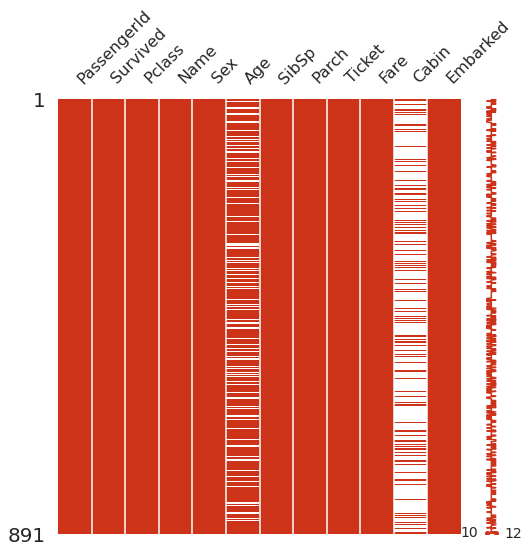

In [ ]:
#iloc[:,:] 처음부터 끝까지 , figsize는 사이즈, color RGB
msno.matrix(df=df_train.iloc[:,:],figsize = (8,8), color = (0.8, 0.2, 0.1))

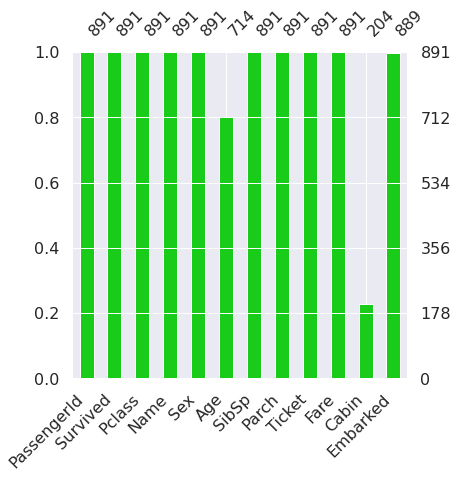

In [ ]:
msno.bar(df=df_train.iloc[:,:], figsize=(6,6), color=(0.1,0.8,0.1))

* 1.2 target label 확인

어떤 distribution 을 가지고 있는 지...1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.




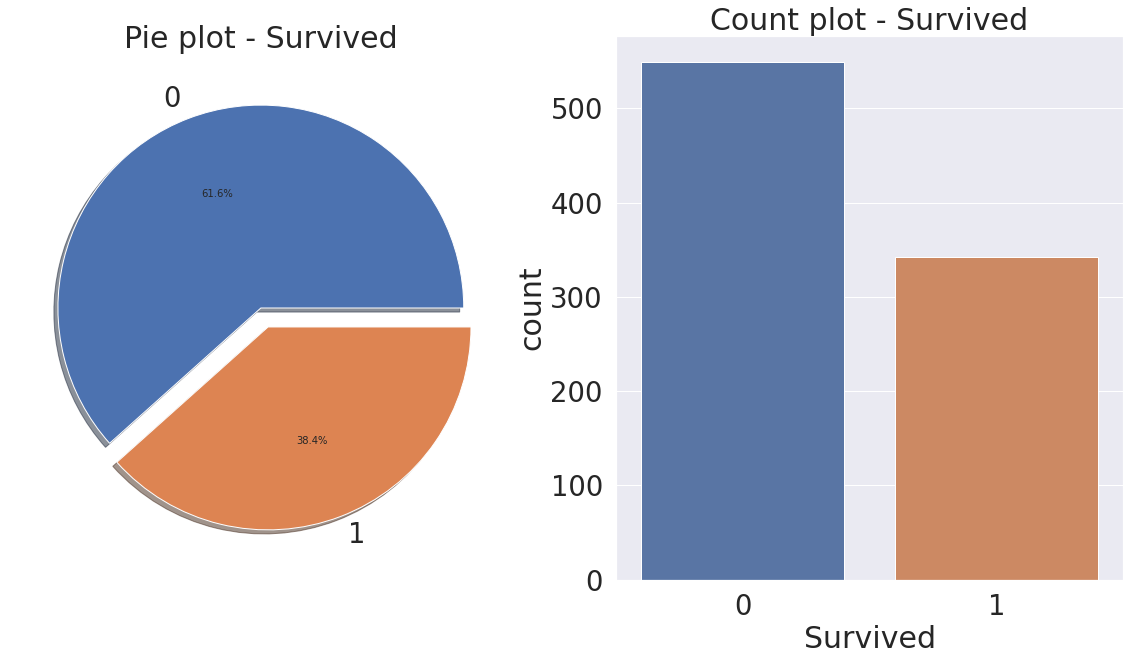

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20,10)) #하나의 행에 두개의 그림, 가로20 세로10
#value_counts().plot.pie는 원그래프, explode는 가르는 간격
df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax= ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 2. EDA

* 2.1 pclass

객실클래스, 카테고리이면서 순서가 있는 데이터 타입



In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
# background_gradient로 heatmpas를 만들 수 있다.(matplotlib 모듈), 값의 크기에 따라 gradient 변화
# margins 파라미터로 행, 열 합 추가 가능

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


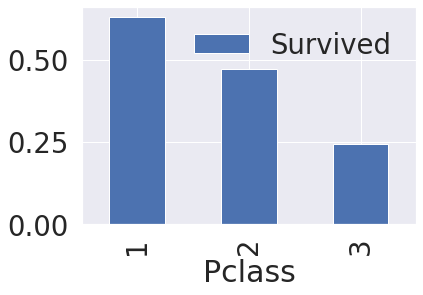

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
#as_index=  이 그룹을 인덱스로 지정할지


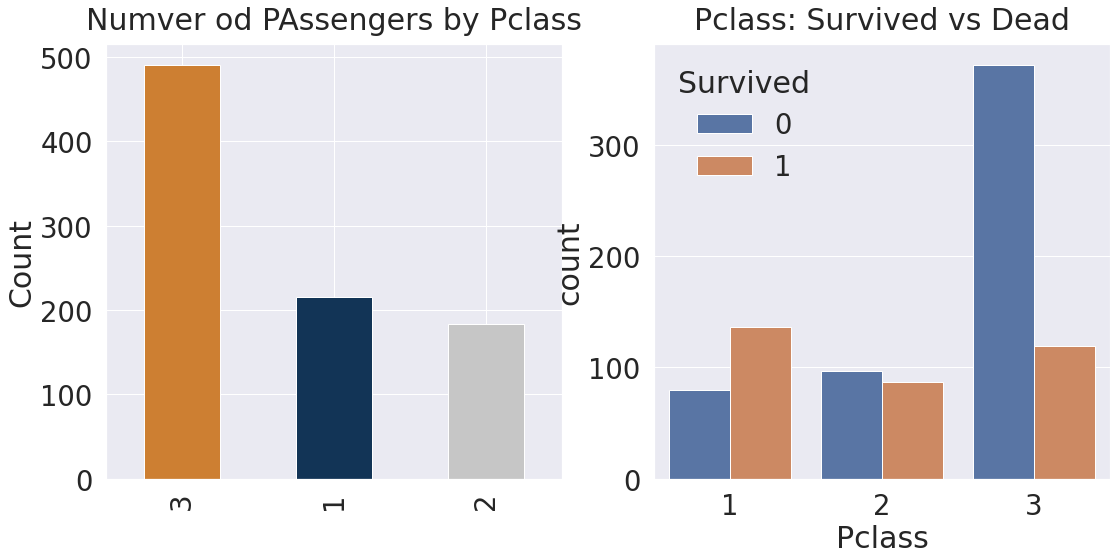

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#123456','#C6C6C6'], ax= ax[0])
ax[0].set_title('Numver od Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

결론 : 클래스가 높을수록 생존확률이 높다. (feature)
* 2.2 sex

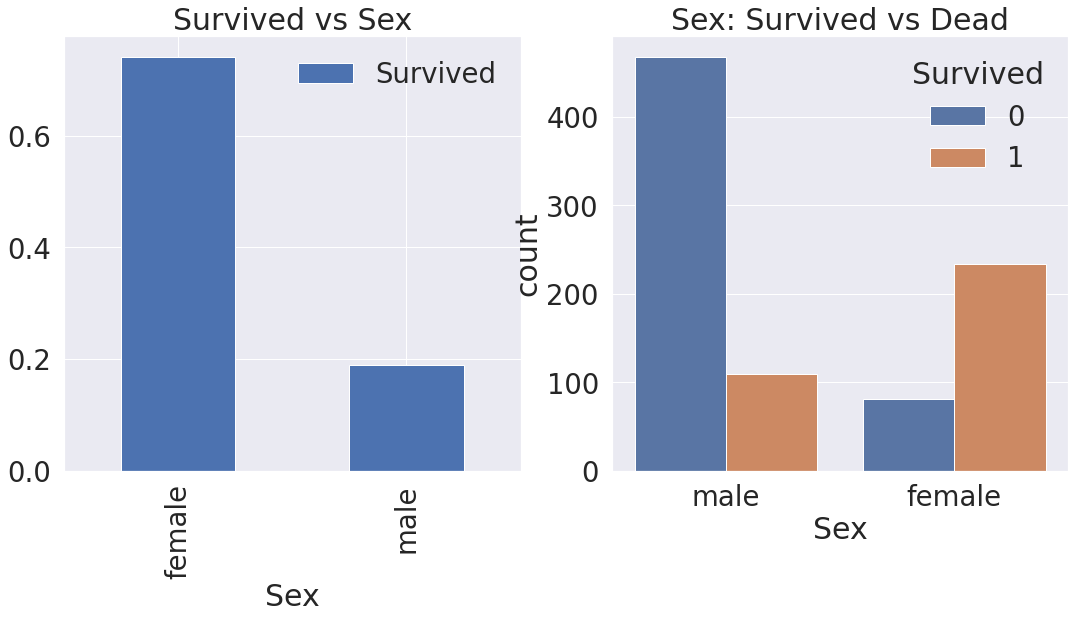

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins= True).style.background_gradient(cmap='ocean')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


결론 : 여자가 생존할 확률이 높다.(feature)
* 2.3 Both sex and pclass

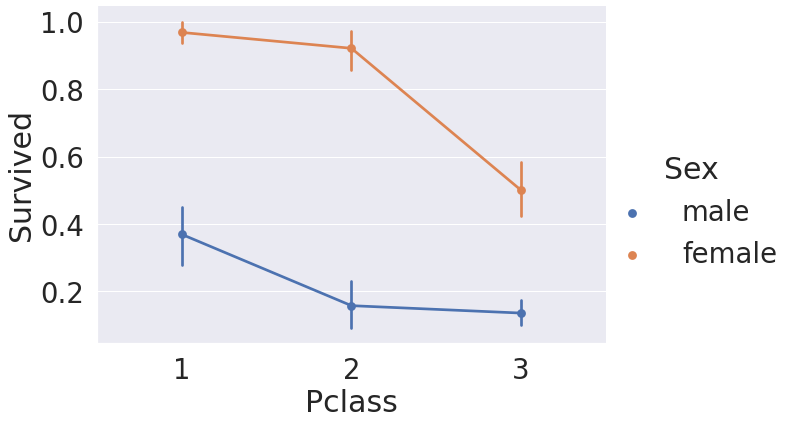

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

여성의 생존확률이 높다. 클래스가 높을수록 생존확률이 높다.

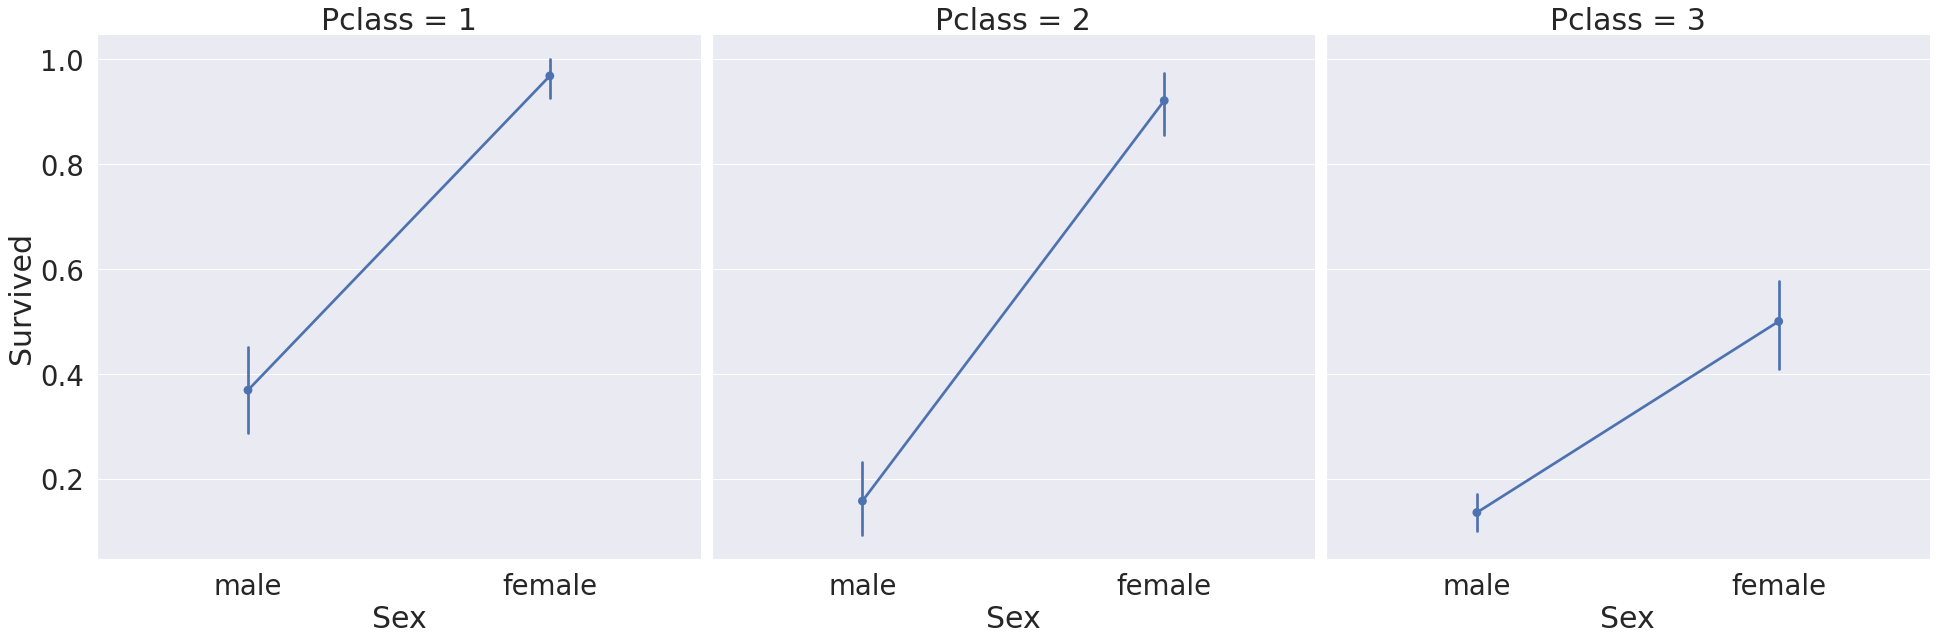

In [ ]:
#hue대신 col으로
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5,size=9, aspet=1)

* 2.4 age

In [ ]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


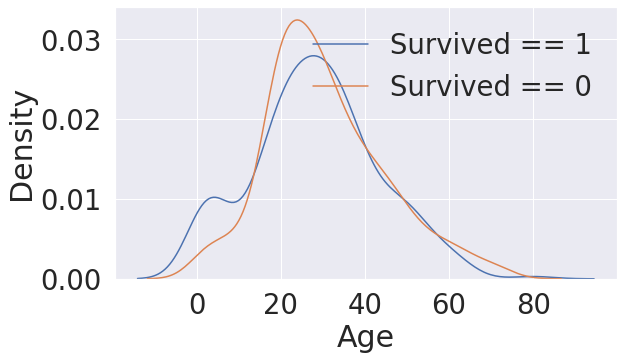

In [ ]:
#나이에 대한 히스토그램
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1','Survived == 0'])

plt.show()

10살 부근에 생존자의 그래프가 솟아오른게 눈에 띈다.

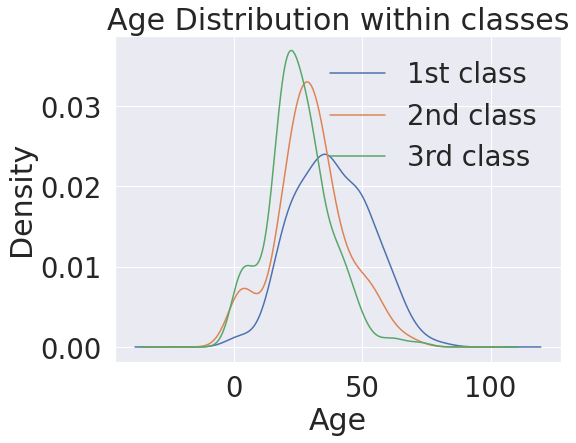

In [ ]:
#Age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

#class가 높을수록 나이많은 사람이 많다.

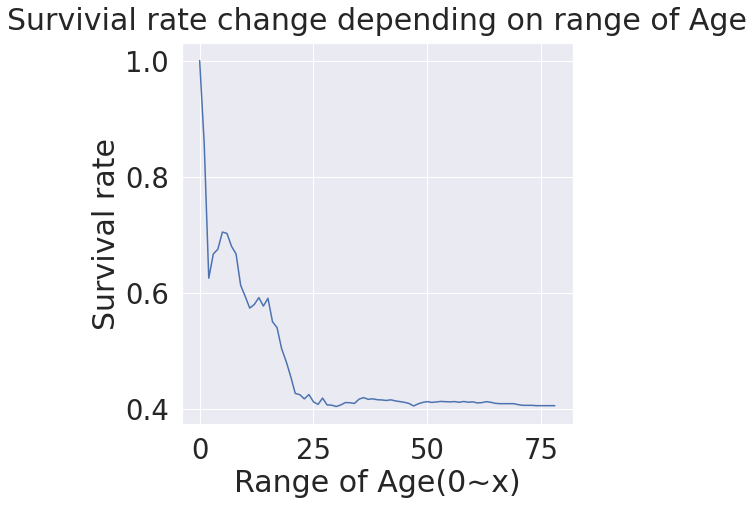

In [ ]:
surv_ratio = []
for i in range(1,80):
  surv_ratio.append(    df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] <i]['Survived'])     )


plt.figure(figsize=(7, 7))
plt.plot(surv_ratio)
plt.title('Survivial rate change depending on range of Age', y= 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

plt.show()
#나이가 어릴수록 생존률이 높다.(feature)

* 2.5 Pclass, Sex, Age

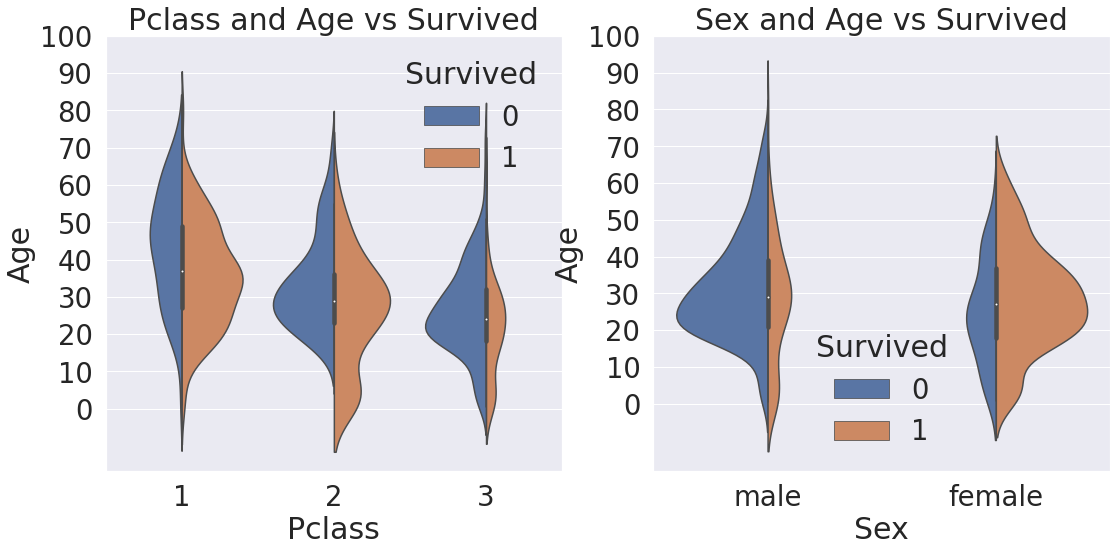

In [ ]:
#seaborn의 violinplot
#x축은 pclass, sex / y축은 age분포

f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot('Pclass','Age',hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age', hue='Survived', data=df_train, scale='count', split=True, aax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

# 나이가 어릴수록 생존률이 높다.
# 여자가 생존률이 높다.
# 여성과 아이를 먼저 챙겼다???

* 2.6 embarked (탑승한항구, 탑승한곳에따른 생존률)

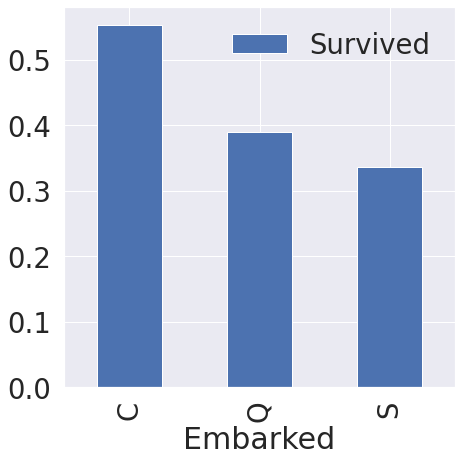

In [ ]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

# C가 높긴하나 모델에 큰영향을 미칠지는 모르겠다. 추루 모델을 만들고 볼거임.

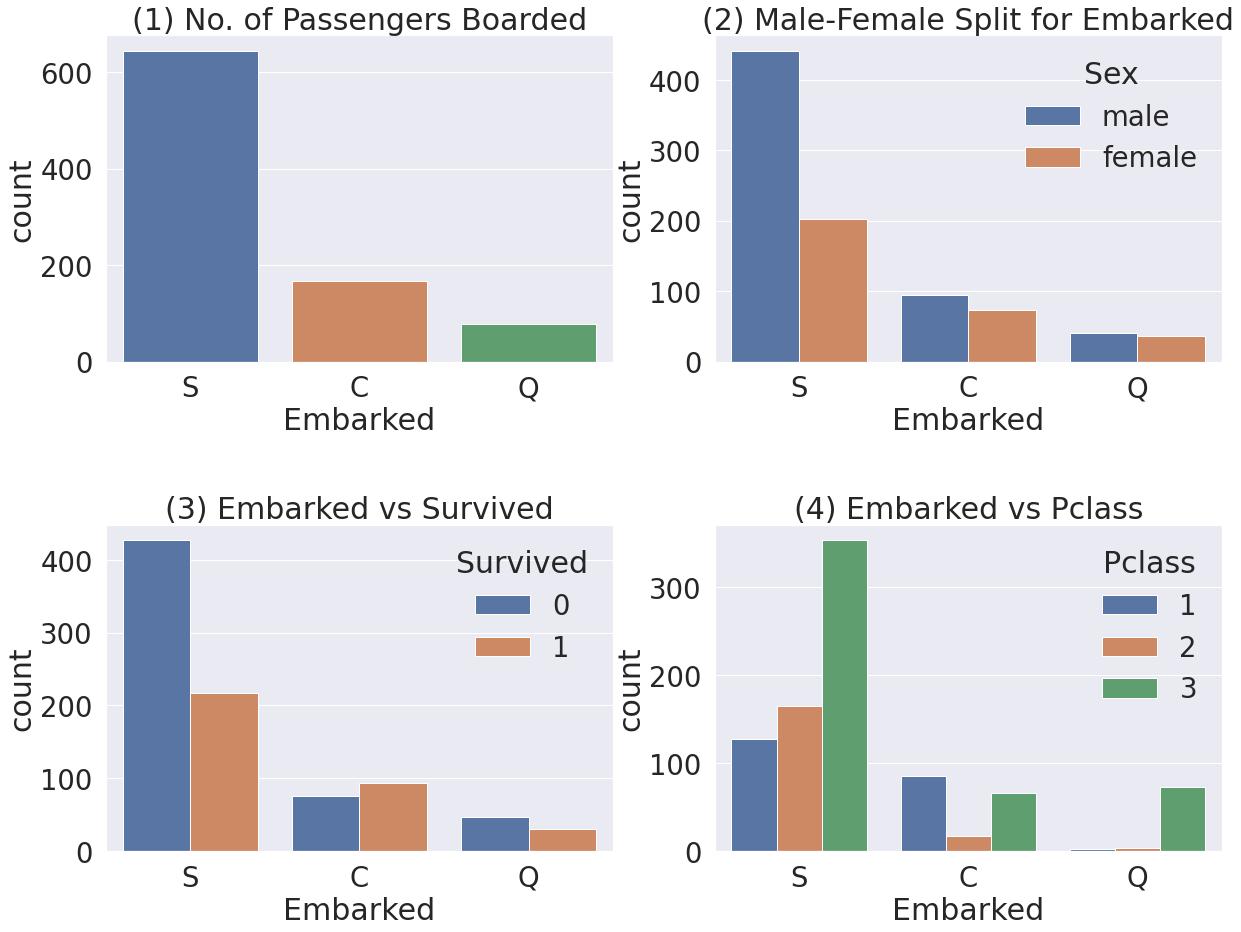

In [ ]:
# 항구별로 feature을 split해서

f, ax=plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5) #간격
plt.show()

# S와 Q항구에 탑승객들의 생존률이 낮다. S와 Q항구에서 3등급이 많았다.
# C항구의 생존률이 높다. 1등급이의 비율이 많다.

* 2.7 family - sibsp(형제 자매) + parch(부모, 자녀)

In [ ]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1 #자기자신 포함
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1 #자기자신 포함

In [ ]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


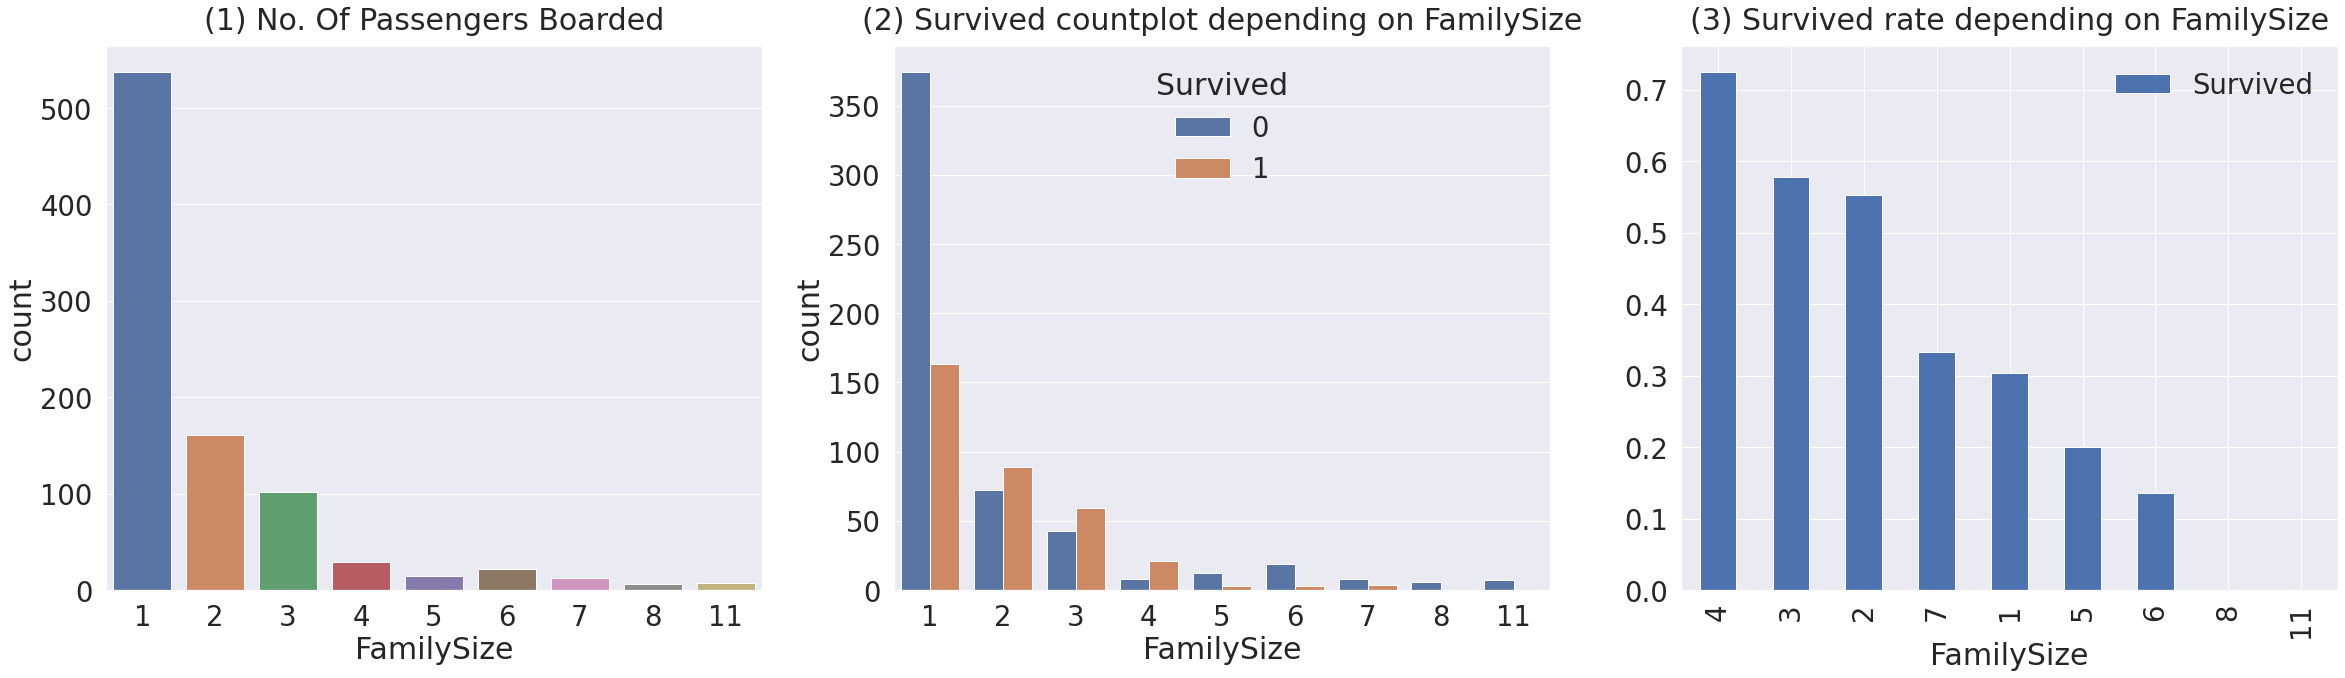

In [ ]:
f,ax=plt.subplots(1, 3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# (1) 가족크기별 분포 
# (2) 가족크기별 생존자수
# (3) 가족크기별 생존률 ->4명이 생존률이 가장높다. 가족수가 너무작아도(1) 너무 커도(5,6,8,11) 생존확률이 낮다.

* fare(탑승요금)

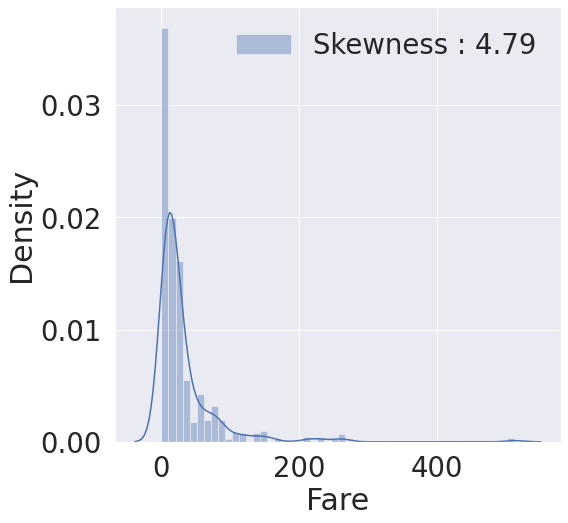

In [ ]:
#연속적인 feature

# 비대칭도, 왜도를 보자. 히스토그램
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# 비대칭적이다. -> 이대로 모델어 넣으면 잘못 학습할것이다. 좋지못한 결과를 부름.
# outlier의 영향을 줄이기 위해 Fare를 log로

In [ ]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

#.apply()는 함수, map()은 lambda, dict 을 넣어줌

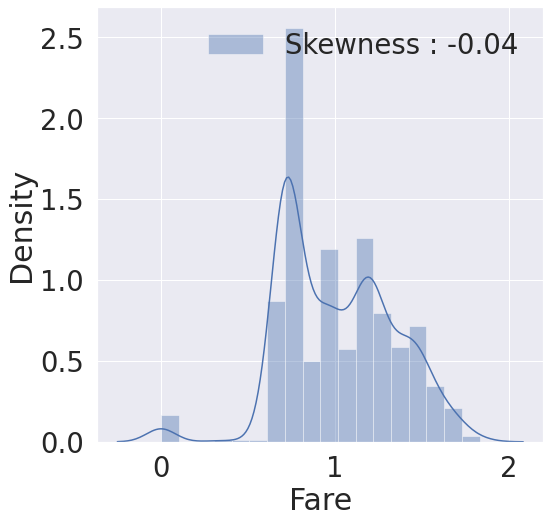

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best') #그림객체에 legend를 달아주겠다.

* 2.9 cabin(객실번호)

77.10%의 null값 -> 포함하지않도록 함

In [138]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamiltSize,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.683603,NaN,S,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.379314,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.735091,NaN,S,1,1


* 2.10 ticket

string data

In [140]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamiltSize   891 non-null    int64  
 13  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [141]:
df_train['Ticket'].value_counts()

347082       7
CA. 2343     7
1601         7
3101295      6
CA 2144      6
            ..
3474         1
35851        1
315153       1
2686         1
A/5 21171    1
Name: Ticket, Length: 681, dtype: int64